<a href="https://colab.research.google.com/github/ProfPaiMau/EmbAIProj1/blob/main/EmbeddedAIOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ver papers com histogramas e fazer igual!

In [36]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
pip install Image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
pip install matplot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
pip install -q tensorflow_model_optimization

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
pip uninstall -y keras


Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install tf-keras

  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\dtms\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv


In [48]:
#Importar o core do tensorflow

import tensorflow as tf
import datetime

#Importacao das layerss para construir CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

#Importar para data pre-processing... load image, data aug etc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#outrods
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2

In [49]:
#Função para desenhar imagens

### defining some function to make our work easier
import matplotlib.pyplot as plt

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plot_images(images_arr, imageWidth, imageHeight):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.reshape(imageWidth, imageHeight), cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [50]:
batch_size = 32 #num imagens a processar ao mesmo tempo
epochs = 50 # Numero de vezes que vai fazer o training de todo o dataset
IMG_HEIGHT = 28 #target resize
IMG_WIDTH = 28 # target resize

In [51]:
# Gera imagens para melhorar o training e reduzir o overfitting, aplicando:
#  - variacoes com data augmentation (tilted, zoom, scaled, moved)

augmented_image_gen = ImageDataGenerator(
        rescale = 1/255.0,
    rotation_range=2,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=0.1,
    shear_range=2,
    brightness_range=[0.9, 1.1],
    validation_split=0.2,

   )

#Normaliza imagens para validacao
normal_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split=0.2,

   )

In [52]:
train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="../../standardOCR/data/training_data",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='training')
val_data_gen = normal_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="../../standardOCR/data/testing_data",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='validation')

Found 16524 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


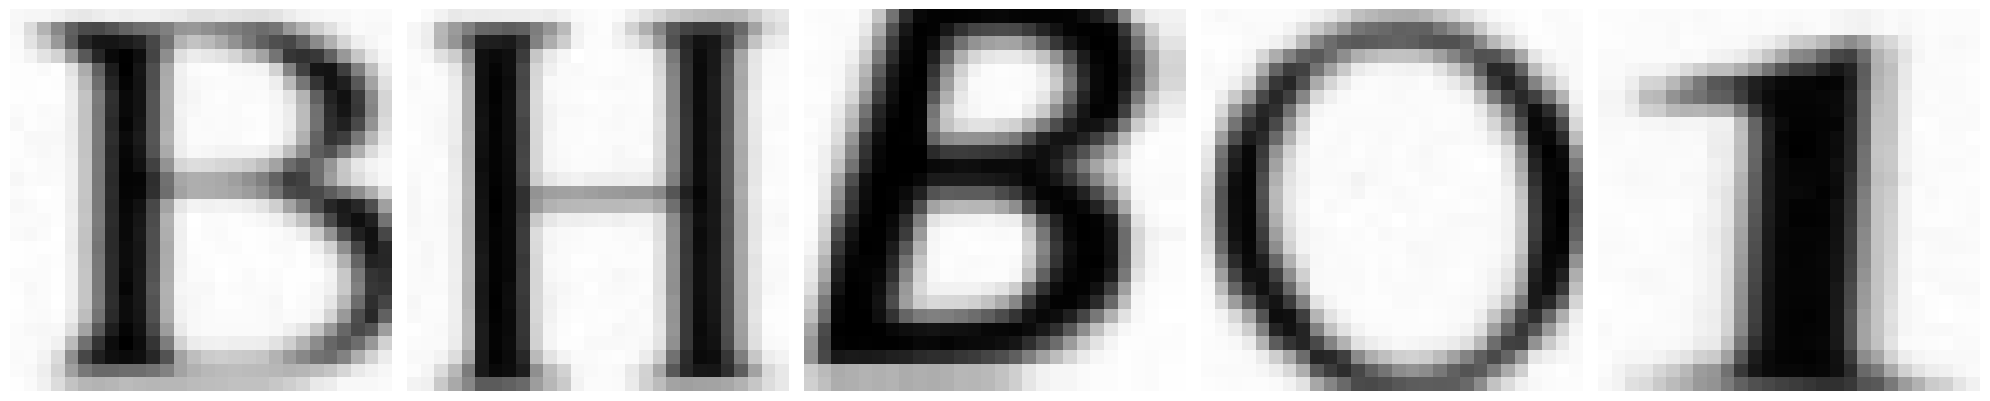

In [53]:
#Fazer um sample para teste se ta tudo ok
sample_training_images, _ = next(train_data_gen)
plot_images(sample_training_images[:7], IMG_WIDTH, IMG_HEIGHT)

In [54]:
# Modelo CCN com um stack linear de camadas
'''
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
# define cnn model
def define_modelo():
    model = Sequential()

    # Adicionar a convulotion layaer tal como explicado Slide 1.6, Sessao 2, pag 30
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Adicionar a MAx pooling layaer tal como explicado Slide 1.6, Sessao 2, pag 31
    model.add(MaxPooling2D((2, 2)))
    # Addflatten layer serve para converter 2D para 1D
    model.add(Flatten())

    # Layer que define o fully connected, 100 neuroms !?!, page 32???
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    # Layer que define a softmax layer, 36 uma saida para cada letra, softmax para multi-class!?!, pag 33
    model.add(Dense(36, activation='softmax'))
    return model
'''

#Versao 2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

def define_modelo():
    # Define input layer with shape (28, 28, 1)
    inputs = Input(shape=(28, 28, 1))

    # Convolutional layer
    x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(inputs)
    
    # Max pooling layer
    x = MaxPooling2D((2, 2))(x)
    
    # Flatten layer to convert 2D to 1D
    x = Flatten()(x)
    
    # Fully connected layer with 100 neurons
    x = Dense(100, activation='relu', kernel_initializer='he_uniform')(x)
    
    # Output layer with 36 neurons for multi-class classification
    outputs = Dense(36, activation='softmax')(x)
    
    # Create the model with inputs and outputs
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [55]:
model = define_modelo()

In [56]:
#Callbacks the que antecipam o termino do calculo

import tensorflow
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
import tensorflow_model_optimization as tfmot


#Prepare call backs
EarlyStop_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('../../standardOCR/model.keras',
                             monitor = 'val_loss',mode = 'min',save_best_only= True)
lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.5,patience = 3,min_lr = 0.00001)
my_callback=[EarlyStop_callback,checkpoint,tfmot.sparsity.keras.UpdatePruningStep()]

In [ ]:
#Treino do modelo
\
# Versão original

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=32,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size,
    callbacks=my_callback
)



Epoch 1/32


C:\Users\dtms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - categorical_accuracy: 0.3478 - loss: 2.4525 - val_categorical_accuracy: 0.9062 - val_loss: 0.2093
Epoch 2/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - categorical_accuracy: 0.7500 - loss: 0.6395 - val_categorical_accuracy: 0.9500 - val_loss: 0.1423
Epoch 3/32
  1/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - categorical_accuracy: 0.8438 - loss: 0.6419

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - categorical_accuracy: 0.8158 - loss: 0.6652 - val_categorical_accuracy: 0.9563 - val_loss: 0.1370
Epoch 4/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - categorical_accuracy: 0.9062 - loss: 0.5030 - val_categorical_accuracy: 0.9500 - val_loss: 0.1703
Epoch 5/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - categorical_accuracy: 0.8760 - loss: 0.4582 - val_categorical_accuracy: 0.9688 - val_loss: 0.1089
Epoch 6/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - categorical_accuracy: 0.8438 - loss: 0.4282 - val_categorical_accuracy: 1.0000 - val_loss: 0.0223
Epoch 7/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - categorical_accuracy: 0.8894 - loss: 0.3961 - val_categorical_accuracy: 0.9625 - val_loss: 0.0928
Epoch 8/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - categorical_accuracy: 0.9688 - loss: 0.2040 - val_categorical_accuracy: 1.0000 - val_loss: 0.0333
Epoch 9/32
516/516 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - categorical_accuracy: 0.9141 - lo

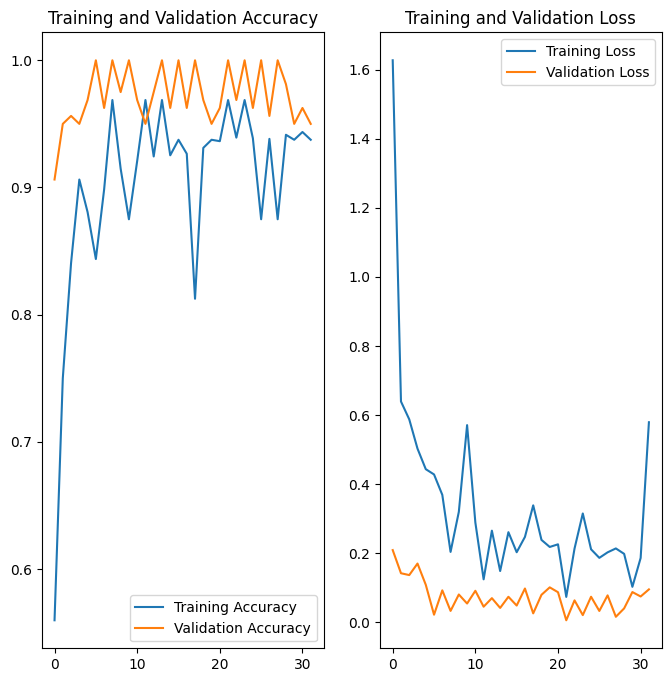

In [58]:
#Plots dos resultado explicados em baixo

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs_range = range(32)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Original results:


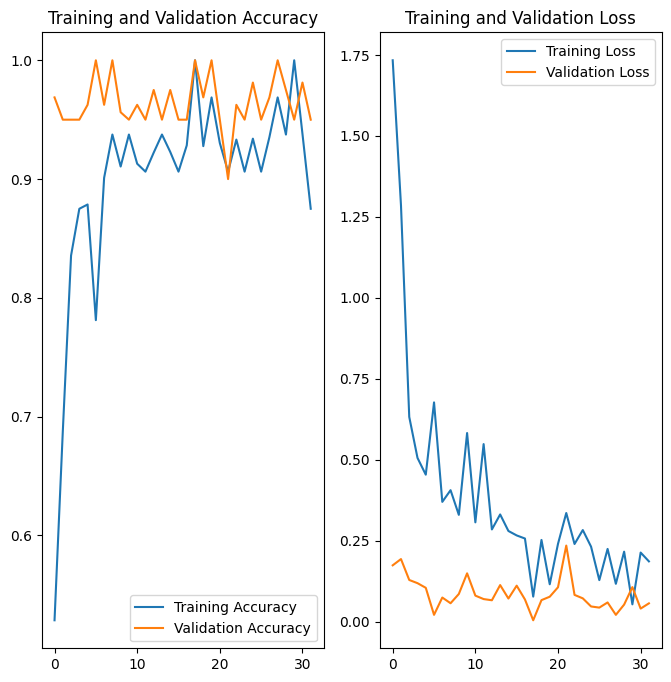